# A4

In [1]:
from google.colab import drive
drive.mount('/content/drive/')
%cd "//content/drive/My Drive/Colab Notebooks/A4"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/
/content/drive/My Drive/Colab Notebooks/A4


In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits import mplot3d
import copy
import mnist_loader
import Network as NN

# Q1: Autoencoder

## (a) Create and Train Network

In [0]:
# Create a network
#mynet = NN.Network([784, 128, 64, 32, 3, 32, 64, 128, 784], type='Bernoulli')
mynet = NN.Network([784, 128, 3, 128, 784], type='classifier')


In [0]:
# Read in 2000 MNIST samples
train, validate, test = mnist_loader.load_data_wrapper()
train_in = np.array(train[0][:1000])
train_class = np.array(train[1][:1000])

Epoch 0: cost [0, 122.55210752711865]
Epoch 1: cost [1, 126.02898459588555]
Epoch 2: cost [2, 115.50711877237929]
Epoch 3: cost [3, 119.19881744499406]
Epoch 4: cost [4, 102.54473079493066]
Epoch 5: cost [5, 115.79605304649165]
Epoch 6: cost [6, 105.73248712315504]
Epoch 7: cost [7, 103.1696900099073]
Epoch 8: cost [8, 103.05394727064873]
Epoch 9: cost [9, 92.9624151499997]
Epoch 10: cost [10, 95.79370109760784]
Epoch 11: cost [11, 95.52902305297708]
Epoch 12: cost [12, 94.67191717837859]
Epoch 13: cost [13, 90.02236311793692]
Epoch 14: cost [14, 93.45278098431946]
Epoch 15: cost [15, 90.81948755954161]
Epoch 16: cost [16, 88.26859027747996]
Epoch 17: cost [17, 95.12950026400179]
Epoch 18: cost [18, 97.13332110544363]
Epoch 19: cost [19, 93.55657871559345]
Epoch 20: cost [20, 93.04745390570996]
Epoch 21: cost [21, 87.89463494440096]
Epoch 22: cost [22, 94.19370760398617]
Epoch 23: cost [23, 95.58736579980965]
Epoch 24: cost [24, 87.02403280234243]
Epoch 25: cost [25, 88.15309502863815]

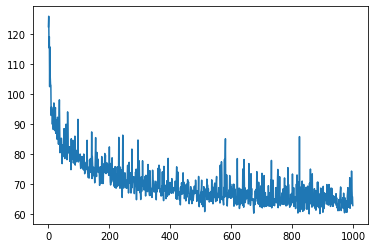

In [0]:
# Train the network
progress = mynet.SGD(train_in, train_in, lrate = 0.05, epochs = 1000, batch_size = 10)

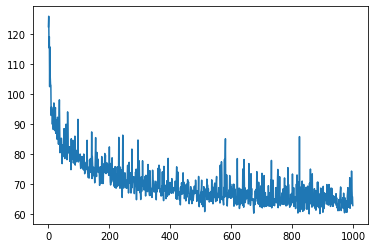

In [0]:
plt.plot(progress[:, 0], progress[:, 1])

Save and/or load the network

In [0]:
mynet.Save('yourNet.net')

In [0]:
mynet = NN.Network.Load('yourNet.net')

## (b) View Reconstructions

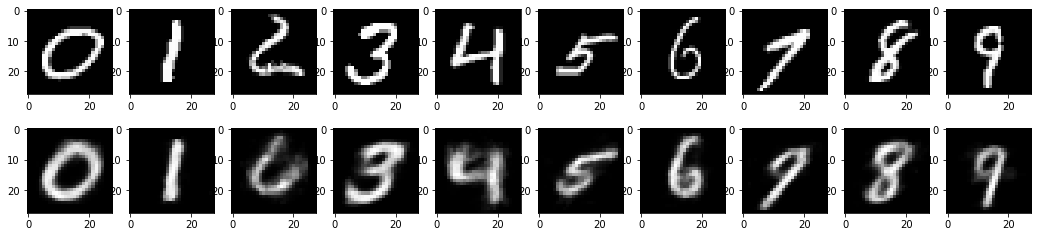

In [0]:
x = []
y = []

plt.figure(figsize = (18,4))

for i in range(10):
  r = np.random.randint(len(train_in))
  while np.where(train_class[r] == 1)[0][0] != i:
    r = np.random.randint(len(train_in))
  
  x.append(train_in[r])
  y.append(mynet.FeedForward(x[i]))

  plt.subplot(2, 10, i+1)
  plt.imshow(np.array(x[i]).reshape(28, 28), cmap = 'gray')

  plt.subplot(2, 10, i+11)  
  plt.imshow(np.array(y[i]).reshape(28, 28), cmap = 'gray')

## (c) Plot Embeddings

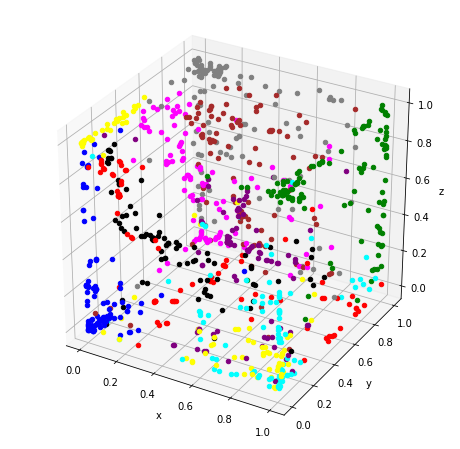

In [0]:
# Plot the embedding space
embedding = []
for i in range(len(train_in)):
  mynet.FeedForward(train_in[i])
  embedding.append(mynet.lyr[2].h)

embedding = np.array(embedding)  
# Here is some code to plot things in 3D
fig = plt.figure(3, figsize=[8,8])
fig.clf()
ax = plt.axes(projection='3d')
for i in range(len(train_in)):
  if np.where(train_class[i] == 1)[0][0] == 0 : color='blue'
  elif np.where(train_class[i] == 1)[0][0] == 1 : color='green'
  elif np.where(train_class[i] == 1)[0][0] == 2 : color='red'
  elif np.where(train_class[i] == 1)[0][0] == 3 : color='cyan'
  elif np.where(train_class[i] == 1)[0][0] == 4 : color='magenta'
  elif np.where(train_class[i] == 1)[0][0] == 5 : color='yellow'
  elif np.where(train_class[i] == 1)[0][0] == 6 : color='black'
  elif np.where(train_class[i] == 1)[0][0] == 7 : color='gray'
  elif np.where(train_class[i] == 1)[0][0] == 8 : color='purple'
  else: color='brown'
   
  ax.scatter3D(embedding[i,0], embedding[i,1], embedding[i,2], color = color);
ax.set_xlabel('x'); ax.set_ylabel('y'); ax.set_zlabel('z');

## (d) Reconstructions

In [0]:
mynet = NN.Network.Load('autoencoder.net')

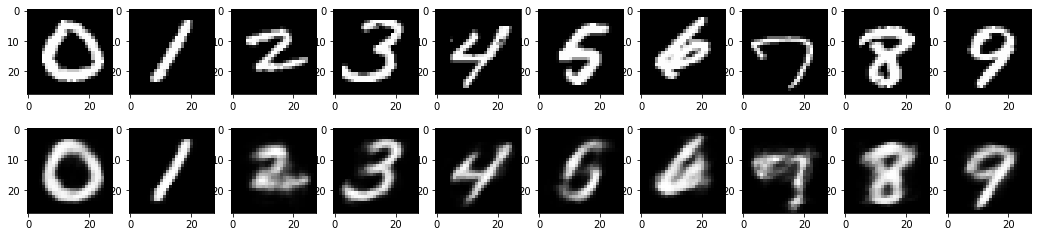

In [0]:
x = []
y = []

plt.figure(figsize = (18,4))

for i in range(10):
  r = np.random.randint(len(train_in))
  while np.where(train_class[r] == 1)[0][0] != i:
    r = np.random.randint(len(train_in))
  
  x.append(train_in[r])
  y.append(mynet.FeedForward(x[i]))

  plt.subplot(2, 10, i+1)
  plt.imshow(np.array(x[i]).reshape(28, 28), cmap = 'gray')

  plt.subplot(2, 10, i+11)  
  plt.imshow(np.array(y[i]).reshape(28, 28), cmap = 'gray')

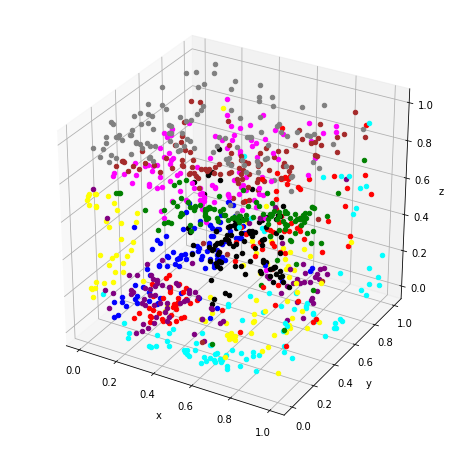

In [0]:
embedding = []
points_i = []
for i in range(len(train_in)):
  mynet.FeedForward(train_in[i])
  # We need these points for the next question part (i)
  if np.where(train_class[i] == 1)[0][0] == 7 : points_i.append(mynet.lyr[3].h)
  embedding.append(mynet.lyr[3].h)

embedding = np.array(embedding)  
# Here is some code to plot things in 3D
fig = plt.figure(3, figsize=[8,8])
fig.clf()
ax = plt.axes(projection='3d')
for i in range(len(train_in)):
  if np.where(train_class[i] == 1)[0][0] == 0 : color='blue'
  elif np.where(train_class[i] == 1)[0][0] == 1 : color='green'
  elif np.where(train_class[i] == 1)[0][0] == 2 : color='red'
  elif np.where(train_class[i] == 1)[0][0] == 3 : color='cyan'
  elif np.where(train_class[i] == 1)[0][0] == 4 : color='magenta'
  elif np.where(train_class[i] == 1)[0][0] == 5 : color='yellow'
  elif np.where(train_class[i] == 1)[0][0] == 6 : color='black'
  elif np.where(train_class[i] == 1)[0][0] == 7 : color='gray'
  elif np.where(train_class[i] == 1)[0][0] == 8 : color='purple'
  else: color='brown'
   
  ax.scatter3D(embedding[i,0], embedding[i,1], embedding[i,2], color = color);
ax.set_xlabel('x'); ax.set_ylabel('y'); ax.set_zlabel('z');

In [0]:
print(points_i)

[array([0.20999925, 0.27441215, 0.91088729]), array([0.115225  , 0.0449774 , 0.91209343]), array([0.60118205, 0.83454388, 0.59465504]), array([0.83881262, 0.34814663, 0.9417682 ]), array([0.16030469, 0.74141539, 0.9971279 ]), array([0.00843173, 0.18956089, 0.90959286]), array([0.17585002, 0.13004192, 0.92763424]), array([0.66820256, 0.59233744, 0.99841184]), array([0.00183628, 0.28081348, 0.90121148]), array([0.71094876, 0.3160297 , 0.94907285]), array([0.00302746, 0.5863256 , 0.86844867]), array([0.51786613, 0.30075473, 0.98206079]), array([0.00619611, 0.24029998, 0.99667961]), array([0.6246231 , 0.19248032, 0.99440959]), array([0.14134231, 0.06397215, 0.93106848]), array([0.63529257, 0.21230148, 0.75307259]), array([0.33973898, 0.99857224, 0.9377506 ]), array([0.7240713 , 0.18147413, 0.99798039]), array([0.00193627, 0.43399015, 0.93840116]), array([0.00143216, 0.30981036, 0.89357697]), array([0.46319317, 0.88932483, 0.95323527]), array([0.92435903, 0.48653623, 0.89322943]), array([0.

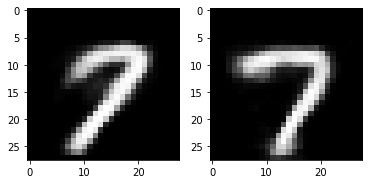

In [0]:
# (i)
#pointA = [0, 0.3, 1]
pointA = [0.20999925, 0.27441215, 0.91088729]
#pointB = [0.1, 0.4, 0.9]
pointB = [0.16030469, 0.74141539, 0.9971279 ]

yA = mynet.FeedForwardFrom(3, pointA)
yB = mynet.FeedForwardFrom(3, pointB)

plt.subplot(1, 2, 1)
plt.imshow(np.array(yA).reshape(28, 28), cmap = 'gray')

plt.subplot(1, 2, 2)
plt.imshow(np.array(yB).reshape(28, 28), cmap = 'gray')

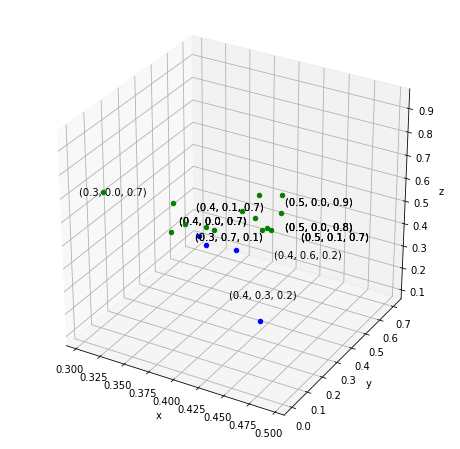

In [0]:
# (ii)
fig = plt.figure(3, figsize=[8,8])
fig.clf()
ax = plt.axes(projection='3d')
for i in range(len(train_in)):
  label = np.where(train_class[i] == 1)[0][0]
  if label == 0 : color='blue'
  if label == 1 : color='green'
  if (label == 0 or label == 1) and 0.3 < embedding[i,0] <0.5 :
    
    ax.scatter3D(embedding[i,0], embedding[i,1], embedding[i,2], color = color);
    i_x = np.round(embedding[i,0], 1)
    i_y = np.round(embedding[i,1], 1)
    i_z = np.round(embedding[i,2], 1)
          
    ax.text(i_x, i_y, i_z, '({}, {}, {})'.format(i_x, i_y, i_z))

ax.set_xlabel('x'); ax.set_ylabel('y'); ax.set_zlabel('z');

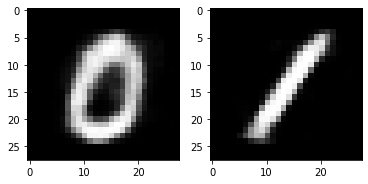

In [0]:
# (ii)
pointA = [0.3, 0.7, 0.1]
pointB = [0.4, 0, 0.7]

yA = mynet.FeedForwardFrom(3, pointA)
yB = mynet.FeedForwardFrom(3, pointB)

plt.subplot(1, 2, 1)
plt.imshow(np.array(yA).reshape(28, 28), cmap = 'gray')

plt.subplot(1, 2, 2)
plt.imshow(np.array(yB).reshape(28, 28), cmap = 'gray')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


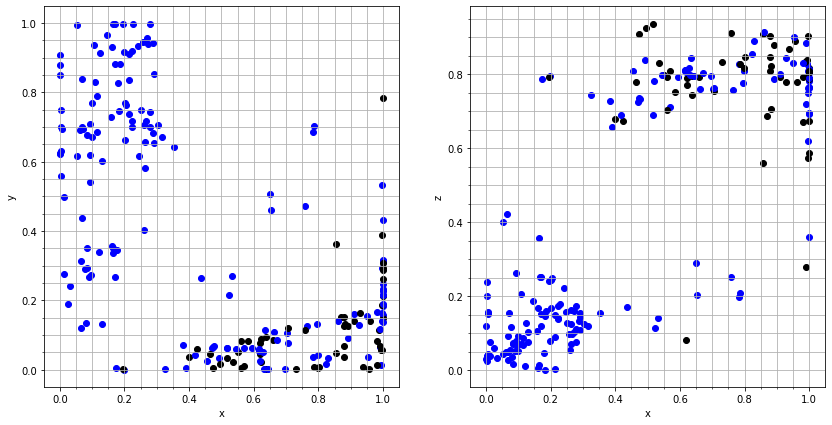

In [0]:
# (iii)
plt.figure(figsize = (14,7))
for i in range(len(train_in)):
  label = np.where(train_class[i] == 1)[0][0]
  if label == 0 : color='blue'
  if label == 6 : color='black'
  if (label == 0 or label == 1):
    plt.subplot(1, 2, 1)
    plt.scatter(embedding[i, 0], embedding[i, 1], color = color)  
    plt.xlabel('x'); plt.ylabel('y')
    plt.grid()
    plt.minorticks_on()
    plt.grid(which = 'minor')

    plt.subplot(1, 2, 2)
    plt.scatter(embedding[i, 0], embedding[i, 2], color = color)  
    plt.xlabel('x'); plt.ylabel('z')  
    plt.grid()
    plt.minorticks_on()
    plt.grid(which = 'minor')


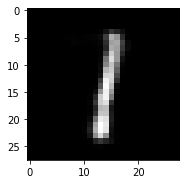

In [0]:
point_iii = [0.9, 0.15, 0.85]

y_iii = mynet.FeedForwardFrom(3, point_iii)
plt.subplot(1, 2, 1)
plt.imshow(np.array(y_iii).reshape(28, 28), cmap = 'gray')

# Q2: BPTT Derivations

## (a) $\frac{\partial E}{\partial V}$

YOUR ANSWER HERE

## (b) $\frac{\partial E}{\partial U}$

YOUR ANSWER HERE

## (c) $\frac{\partial E}{\partial W}$

YOUR ANSWER HERE

## (d) $\frac{\partial E}{\partial b}$

YOUR ANSWER HERE

# Q3: RNN

## Read in the data

The code below creates two lists:
  - `sentences`, and
  - `next_chars`
  
Each list element represents a sequences of characters. There are 3 ways to represent a character:
1. As a string, eg. `'b'`
2. As an index to a character set, eg. `2`
3. As a one-hot vector, eg. `[0, 0, 1, 0, ...]`

The lists `sentences` and `next_chars` store the characters as indices. The utility functions
  - `char2vec`
  - `index2vec`
  - `vec2char`
  - `vec2index`
  
transform the characters between the 3 representations. You can also use the dictionaries `char_indices` and `indices_char` to convert between a string character and and index. The code below contains some examples.

In [3]:
import re
text = open('origin_of_species.txt').read().lower()
chars = sorted(list(set(text)))
chars.insert(0, "\0") #Add newline character
vocab_size = len(chars)

char_indices = dict((c, i) for i, c in enumerate(chars))
indices_char = dict((i, c) for i, c in enumerate(chars))
idx = [char_indices[c] for c in text]

# Let's simplify it by keeping only letters and spaces
filt_idx = []
for i in idx:
    if i<=24:
        filt_idx.append(2)
    elif i>24:
        filt_idx.append(i)
blah = ''.join([indices_char[f] for f in filt_idx])
text = re.sub(' +', ' ', blah)
chars = sorted(list(set(text)))
vocab_size = len(chars)
print('Character set: '+''.join(chars)+' (first char is a space)')

char_indices = dict((c, i) for i, c in enumerate(chars))
indices_char = dict((i, c) for i, c in enumerate(chars))
idx = [char_indices[c] for c in text]

print('There are '+str(vocab_size)+' characters in our character set')

''.join(indices_char[i] for i in idx[:70])

def char2vec(c):
    v = np.zeros(vocab_size)
    v[char_indices[c]] = 1.
    return v

def index2vec(i):
    v = np.zeros(vocab_size)
    v[i] = 1.
    return v

def vec2index(v):
    i = np.argmax(v)
    return i

def vec2char(v):
    return indices_char[vec2index(v)]

'''Form the dataset in sentences'''
sentences_length = 10
sentences = []
next_chars = []
for i in range(0, 5000 - sentences_length + 1):
    sentences.append(idx[i: i + sentences_length]) #Assume a sentence is made of X characters
    next_chars.append(idx[i + 1: i + sentences_length + 1]) #Offset by 1 to the right for the target

sentences = np.concatenate([[np.array(o)] for o in sentences[:-2]])
next_chars = np.concatenate([[np.array(o)] for o in next_chars[:-2]])
sentences.shape, next_chars.shape

def read_sentence(vec):
    return ''.join(indices_char[i] for i in vec)

print('Here is how you can view one of the samples:')
print('Sample input: ['+read_sentence(sentences[0])+']')

Character set:  abcdefghijklmnopqrstuvwxyz (first char is a space)
There are 27 characters in our character set
Here is how you can view one of the samples:
Sample input: [on the ori]


## Some utility functions

In [0]:
def sigma(z):
    return np.clip(z, a_min=0, a_max=None)  # ReLU
    #return 1./(1+np.exp(-z))  # use this for logistic
    #return np.tanh(z)

def sigma_primed(y):
    return np.clip(np.sign(y), a_min=0, a_max=1)  # Derivative of ReLU
    #return y*(1.-y)  # use this for logistic
    #return (1 - y ** 2)

def softmax(z):
    ez = np.exp(z)
    denom = np.sum(ez)
    return ez / denom


#def CrossEntropy(y, t):  # should rename it to CategoricalCE
def CategoricalCE(y, t):  # should rename it to CategoricalCE
    return -sum(t*np.log(y))

## (a) Complete BPTT

In [0]:
class RNN():
    
    def __init__(self, dims, seq_length=10):
        '''
         Input:
           dims is [X, H, Y], where the input has layer has X neurons, the
                hidden layer has H neurons, and the output layer has Y neurons.
           seq_length is how many steps to unroll the RNN through time
                (this is the same as tau in the lecture notes)
        '''
        self.X, self.H, self.Y = dims
        self.seq_length = seq_length
        # Input layer
        self.xs = [np.zeros(self.X) for x in range(seq_length)] # activity
        # Hidden layer
        self.hs = [np.zeros(self.H) for x in range(seq_length)] # activity
        self.ss = [np.zeros(self.H) for x in range(seq_length)] # current of hidden 
        # Output layer
        self.ys = [np.zeros(self.Y) for x in range(seq_length)] # activity
        
        # Connection weights
        self.U = np.random.normal(size=[self.H, self.X])/np.sqrt(self.X) # input->hidden
        #self.W = np.random.normal(size=[self.H, self.H])/np.sqrt(self.H) # hidden->hidden
        self.W = np.zeros([self.H, self.H]) # hidden->hidden
        self.V = np.random.normal(size=[self.Y, self.H])/np.sqrt(self.H) # hidden->output
        self.b = np.zeros(self.H) # biases for hidden nodes
        self.c = np.zeros(self.Y) # biases for output nodes
        
    def ForwardTT(self, seq_in):
        '''
         i = ForwardTT(seq_in)
        
         Propagates the RNN forward through time, saving all the intermediate
         states that will be needed for backprop through time (BPTT).
        
         Input:
           seq_in is a vector of indecies, with self.seq_length elements.
        
         Output:
           i is the index of the character predicted to follow the input.
         
         This method's main purpose is to update the states of the activites
         in the time-unrolled network.
        '''
        self.xs[0] = index2vec(seq_in[0]) # convert to character vector
        
        # Starting input current for hidden nodes
        self.ss[0] = np.dot(self.U, self.xs[0]) + self.b
        self.hs[0] = sigma(self.ss[0])  # Activation of hidden nodes
        
        # Input current for output nodes
        zs = np.dot(self.V, self.hs[0]) + self.c
        self.ys[0] = softmax(zs)  # Activation of output nodes


        # Now process forward in time
        for i in range(1, self.seq_length):
            self.xs[i] = index2vec(seq_in[i])  # input vector
            
            # Input current for hidden nodes, including recurrent connections
            self.ss[i] = np.dot(self.U, self.xs[i]) + np.dot(self.W, self.hs[i-1]) + self.b
            self.hs[i] = sigma(self.ss[i])  # Activation
            
            # Input current for output nodes
            zs = np.dot(self.V, self.hs[i]) + self.c
            self.ys[i] = softmax(zs)  # Activation
 
            
        # Might as well output the final state of the output
        return vec2index(self.ys[-1])
    
    def Generate(self, n=1):
        '''
         c = Generate(n=1)
         
         Runs the RNN from the last state after running ForwardTT, outputting
         the next n characters.
         
         Input:
           n is the number of characters you want to predict
           
         Output:
           c is a string of n characters
        '''
        y = self.ys[-1]  # Final output of ForwardTT
        c = vec2char(y)  # Convert it to a character string
        h = self.hs[-1]  # Starting with last hidden state...
        # Loop forward in time
        # (no need to record states, since we won't be doing BPTT)
        for nn in range(n-1):
            x = copy.copy(y)  # Use last output as next input
            
            # Input current for hidden nodes
            s = np.dot(self.U, x) + np.dot(self.W, h) + self.b
            h = sigma(s)  # Activation
            
            # Input current for output nodes
            z = np.dot(self.V, h) + self.c
            y = softmax(z)  # Activation

            
            # And add the next character to our output string
            c += vec2char(y)
            
        return c
            
    def BPTT(self, seq_in, seq_out):
        '''
         BPTT(seq_in, seq_out)
         
         Performs backprop through time on one sample given by the input and
         output sequence.
         
         Input:
           seq_in is a vector of indices specifying the input sequence of
                   characters.
           seq_out is a vector of indices specifying the output sequence of
                   characters. Typically, seq_out is the same as seq_in, but
                   shifted by 1 character.
         
         Output:
           None, but the connection weights and biases are updated.
        '''
        # Initialize gradients to zero
        self.dEdV = np.zeros(np.shape(self.V))
        self.dEdW = np.zeros(np.shape(self.W))
        self.dEdU = np.zeros(np.shape(self.U))
        self.dEdb = np.zeros(np.shape(self.b))
        self.dEdc = np.zeros(np.shape(self.c))
        
        # =============================
        # =============================
        # =  YOUR CODE HERE ===========
        # =============================
        # =============================
        dCdz = np.zeros(np.shape(self.ys))
        
        for i in range(self.seq_length):
          dCdz[i] = self.ys[i] - index2vec(seq_out[i]) # C.E + Softmax activation function
          
        for i in range(self.seq_length):  
          self.dEdV += np.outer(dCdz[i], self.hs[i])
          self.dEdc += dCdz[i]
        
        dEdh = np.zeros(np.shape(self.hs))
        dEdh[-1] = self.V.T @ dCdz[-1]
             
        for i in range(self.seq_length - 2, -1, -1):
          dEdh[i] = self.V.T @ dCdz[i] + self.W.T @ (sigma_primed(self.hs[i + 1]) * dEdh[i+1])
          
        for i in range(self.seq_length):
          self.dEdU += np.outer(sigma_primed(self.hs[i]) * dEdh[i], self.xs[i])  
          self.dEdb += dEdh[i] * sigma_primed(self.hs[i]) 

        for i in range(self.seq_length - 1):
           self.dEdW += np.outer(sigma_primed(self.hs[i + 1]) * dEdh[i + 1], self.hs[i])

    def Evaluate(self, train_in, train_out):
        '''
         loss = Evaluate(train_in, train_out)
         
         Evaluates the network on the supplied dataset.
         
         Input:
           train_in is a list of input sequences (see ForwardTT for format of input)
           train_out is the corresponding list of output sequences
           
         Output:
           loss is the average cross entropy
        '''
        val = 0.
        for x, t in zip(train_in, train_out):
            self.ForwardTT(x)
            for i in range(self.seq_length):
                val += CategoricalCE(self.ys[i], index2vec(t[i]))
        return val/len(train_in)
 

    def Train(self, train_in, train_out, kappa=0.05, epochs=1):
        '''
         Train(train_in, train_out, kappa=0.05, epochs=1)
         
         Performs epochs of gradient descent, performing BPTT after each sample.
         
         Input:
           train_in and train_out is the training dataset
           kappa is the learning rate
           epochs is the number of times to go through the dataset
           
         Output:
           None, but the connection weights and biases are updated
                '''
        loss_history = []
        # Loop over epochs
        for e in range(epochs):
            
            # Shuffle the training data
            data_shuffled = list(zip(train_in, train_out))
            np.random.shuffle(data_shuffled)
            
            for x, t in data_shuffled:
                self.ForwardTT(x)  # Forward through time
                self.BPTT(x, t)    # Backprop through time
                # Note that BPTT starts by resetting the gradients to zero.
                
                # Apply update to connection weights and biases
                self.V -= kappa * self.dEdV
                self.U -= kappa * self.dEdU
                self.W -= kappa * self.dEdW
                self.b -= kappa * self.dEdb
                self.c -= kappa * self.dEdc
            
            loss_history.append([e, self.Evaluate(train_in, train_out)])

            print('Epoch '+str(e)+', Loss = '+str(self.Evaluate(train_in, train_out)))
            
        return  np.array(loss_history)

## (b) Create the RNN

In [0]:
# YOUR CODE HERE
net = RNN([27, 400, 27])

## (c) Train

In [11]:
# You might opt to have more than one train command, using different
# learning rates and numbers of epochs. Each one builds on the results
# from the last run.
#net.Train(...)

progress = net.Train(sentences, next_chars, kappa=0.01, epochs = 15)

Epoch 0, Loss = 14.624648254559101
Epoch 1, Loss = 11.407201619623052
Epoch 2, Loss = 9.725232668173769
Epoch 3, Loss = 9.40195500419963
Epoch 4, Loss = 8.6333789385747
Epoch 5, Loss = 8.44642551294481
Epoch 6, Loss = 8.320916087595137
Epoch 7, Loss = 8.502074938864373
Epoch 8, Loss = 8.19476054668368
Epoch 9, Loss = 8.65003405485322
Epoch 10, Loss = 8.639167964343228
Epoch 11, Loss = 8.495980762436162
Epoch 12, Loss = 8.621900996373915
Epoch 13, Loss = 8.996186580187818
Epoch 14, Loss = 8.84738974687252


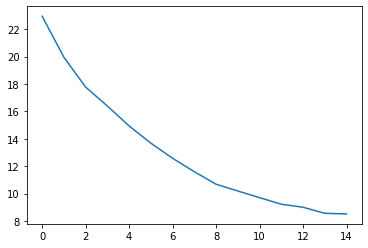

In [0]:
plt.plot(progress[:, 0], progress[:, 1])

## (d) Evaluate

In [12]:
n = 38
net.ForwardTT(sentences[n])
blah = read_sentence(sentences[n])
print('Input:      '+blah)
print('Prediction: '+blah+net.Generate(5))
print('Actual:     '+blah+read_sentence(sentences[n+10]))

Input:      n introduc
Prediction: n introduction 
Actual:     n introduction when 


In [0]:
blah = 'harles dar'
blah = read_sentence(sentences[np.random.randint(len(sentences))])
x = [char_indices[c] for c in blah]
net.ForwardTT(x)
print(blah)
print(blah+net.Generate(10))

geological
geological successen
